In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from water_properties import density, enthalpy, heat_capacity, conductivity, viscosity

In [3]:
def simplified_model_for_fit(x, a00, a01, a02, a10, a11, a12, a20, a21, a22):
    
    c = [[a00, a01, a02],[a10, a11, a12],[a20, a21, a22]] 
    
    T, P = x
    
    return simplified_model(T, P, c)

In [4]:
def simplified_model(T, P, c):
    
    return np.polynomial.polynomial.polyval2d(T, P, c)

In [5]:
def calculate_output(func,X1,X2,*args):
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):                     
        for j in range(X2.shape[1]):
            Z[i,j] = func(X1[i,j],X2[i,j],*args)[0]
    return Z

In [15]:
limits = [278., 353., 10000., 1000000.]
npoints = 100
T = np.linspace(limits[0], limits[1], npoints)
P = np.linspace(limits[2], limits[3], npoints)
X1, X2 = np.meshgrid(T, P)


In [16]:
def fit(model, X1, X2):
    Z = calculate_output(model,X1,X2)
    size = X1.shape
    x1_1d = X1.reshape((1, np.prod(size)))
    x2_1d = X2.reshape((1, np.prod(size)))
    z_1d = Z.reshape((1, np.prod(size)))

    xdata = np.vstack((x1_1d, x2_1d))
    ydata = z_1d[0]
    popt, pcov = curve_fit(simplified_model_for_fit, xdata, ydata)
    
    c = popt.reshape((3,3))
    
    Z_fit = simplified_model(X1,X2,c)
    
    z_fit_1d = Z_fit.reshape((1, np.prod(size)))
    
    # residual sum of squares
    ss_res = np.sum((z_1d[0] - z_fit_1d[0]) ** 2)

    # total sum of squares
    ss_tot = np.sum((z_1d[0] - np.mean(z_1d[0])) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return (c, Z_fit, Z, r2)

In [17]:
def plot_result(name, X1, X2, Z, Z_fit):
    
    plt.subplot(1, 2, 1)
    plt.title("Real {0}".format(name))
    plt.pcolormesh(X1, X2, Z)
    plt.axis(limits)
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.title("Fitted {0}".format(name))
    plt.pcolormesh(X1, X2, Z_fit)
    plt.axis(limits)
    plt.colorbar()
    plt.show()

DENSITY


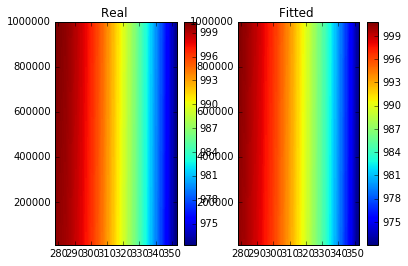

Parameters: [[ 7.34932166e+02  3.00114904e-06 -1.03284845e-13]
 [ 2.00946864e+00 -1.57558559e-08  6.55299865e-16]
 [-3.79375187e-03  2.41680119e-11 -1.03916779e-18]]
R2: 0.9996981706248788


In [18]:
print("DENSITY")
c, Z_fit, Z, r2 = fit(density, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict = dict()
c_dict['density'] = c

ENTHALPY


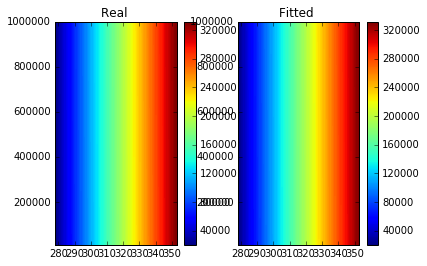

Parameters: [[-1.14300669e+06  2.76932708e-03 -1.65617505e-11]
 [ 4.18741376e+03 -9.41078372e-06  9.47294517e-14]
 [-7.66664890e-03  1.08497737e-08 -1.36786265e-16]]
R2: 0.9999998299540694


In [19]:
print("ENTHALPY")
c, Z_fit, Z, r2 = fit(enthalpy, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['enthalpy'] = c

VISCOSITY


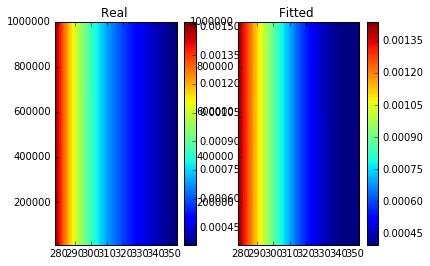

Parameters: [[ 2.64395831e-02 -5.33641016e-11  4.29013822e-19]
 [-1.49875404e-04  3.22989760e-13 -2.65882055e-21]
 [ 2.15632416e-07 -4.85829663e-16  4.11084517e-24]]
R2: 0.9932927953310706


In [20]:
print("VISCOSITY")
c, Z_fit, Z, r2 = fit(viscosity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['viscosity'] = c

HEAT CAPACITY


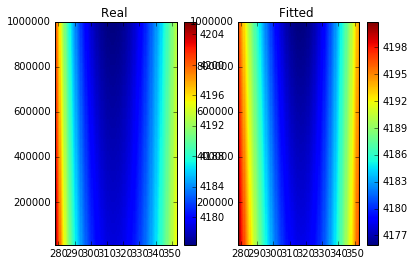

Parameters: [[ 5.66685353e+03 -6.55474142e-05 -1.26388806e-13]
 [-9.38832563e+00  3.76870350e-07  9.99815092e-16]
 [ 1.48029878e-02 -5.60190728e-10 -1.79692966e-18]]
R2: 0.9666605875351494


In [21]:
print("HEAT CAPACITY")
c, Z_fit, Z, r2 = fit(heat_capacity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['heat_capacity'] = c

CONDUCTIVITY


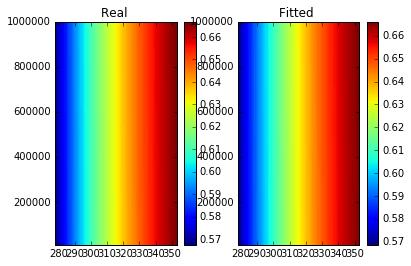

Parameters: [[-7.82942581e-01  7.51176144e-09 -2.80953450e-17]
 [ 7.66718213e-03 -4.25398696e-11  1.61930300e-19]
 [-1.00913840e-05  6.46458388e-14 -2.37494994e-22]]
R2: 0.9998184594480263


In [22]:
print("CONDUCTIVITY")
c, Z_fit, Z, r2 = fit(conductivity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['conductivity'] = c

In [23]:
import pprint
pprint.pprint(c_dict)

{'conductivity': array([[-7.82942581e-01,  7.51176144e-09, -2.80953450e-17],
       [ 7.66718213e-03, -4.25398696e-11,  1.61930300e-19],
       [-1.00913840e-05,  6.46458388e-14, -2.37494994e-22]]),
 'density': array([[ 7.34932166e+02,  3.00114904e-06, -1.03284845e-13],
       [ 2.00946864e+00, -1.57558559e-08,  6.55299865e-16],
       [-3.79375187e-03,  2.41680119e-11, -1.03916779e-18]]),
 'enthalpy': array([[-1.14300669e+06,  2.76932708e-03, -1.65617505e-11],
       [ 4.18741376e+03, -9.41078372e-06,  9.47294517e-14],
       [-7.66664890e-03,  1.08497737e-08, -1.36786265e-16]]),
 'heat_capacity': array([[ 5.66685353e+03, -6.55474142e-05, -1.26388806e-13],
       [-9.38832563e+00,  3.76870350e-07,  9.99815092e-16],
       [ 1.48029878e-02, -5.60190728e-10, -1.79692966e-18]]),
 'viscosity': array([[ 2.64395831e-02, -5.33641016e-11,  4.29013822e-19],
       [-1.49875404e-04,  3.22989760e-13, -2.65882055e-21],
       [ 2.15632416e-07, -4.85829663e-16,  4.11084517e-24]])}
